In [1]:
import pandas as pd 
df = pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Figure size 1080x432 with 0 Axes>

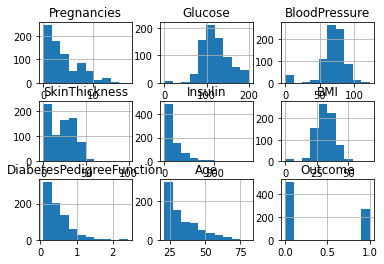

<Figure size 1080x432 with 0 Axes>

In [2]:
from matplotlib import pyplot as plt

df.hist()
plt.figure(figsize = (15,6))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

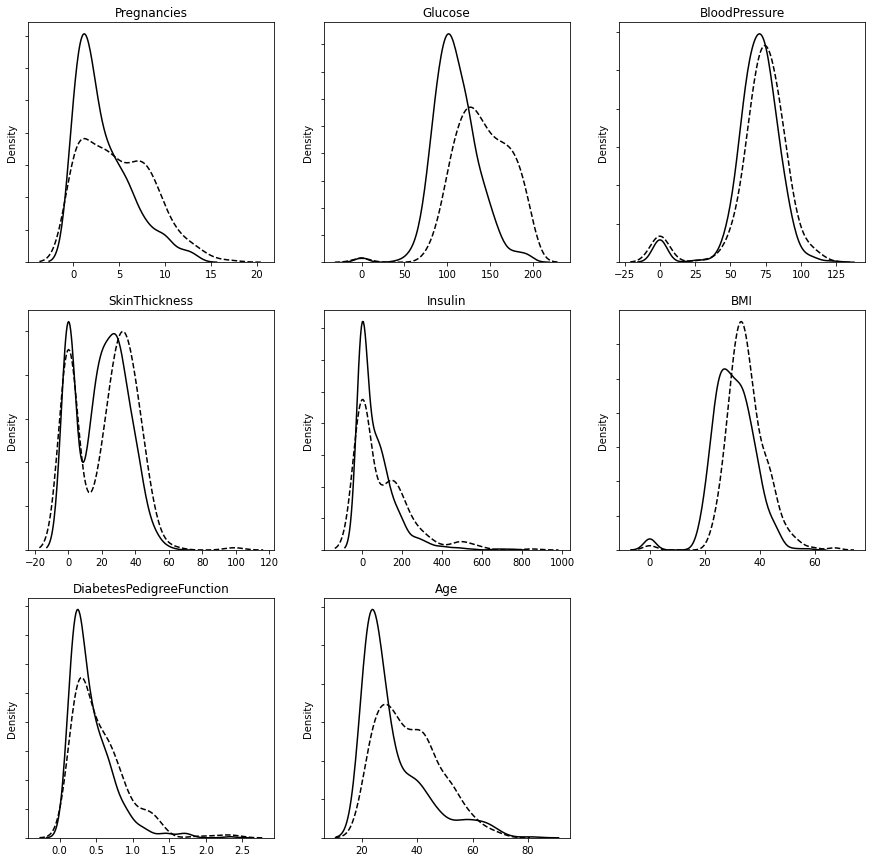

In [3]:
import seaborn as sns 
plt.subplots(3,3,figsize = (15,15))
for index, col in enumerate(df.columns):
    ax = plt.subplot(3,3,index +1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist = False,axlabel = False,kde_kws = {'linestyle':'-','color' :'Black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist = False,axlabel = False,kde_kws = {'linestyle':'--','color' :'Black', 'label':"Diabetes"})
    ax.set_title(col)
plt.subplot(3,3,9).set_visible(False)
plt.show()

In [4]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col+ ":   " + str(missing_rows))

Pregnancies:   111
Glucose:   5
BloodPressure:   35
SkinThickness:   227
Insulin:   374
BMI:   11
DiabetesPedigreeFunction:   0
Age:   0
Outcome:   500


In [7]:
import numpy as np 
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [8]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled,columns= df.columns)

In [9]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [10]:
print(df.describe().loc[['mean','std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00           0.00           0.00     0.00  0.00   
std          1.00     1.00           1.00           1.00     1.00  1.00   
max          3.91     2.44           2.73           4.92     6.65  4.46   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [11]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:,'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [12]:
# ! pip install tensorflow

In [13]:
from keras.models import Sequential
model  = Sequential()

In [14]:
from keras.layers import Dense
model.add(Dense(32, activation = 'relu',input_dim = 8))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [15]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

## Cross-Entropy: 
### binary cross-entropy is also related to and often confused with logistic loss, called log loss. Although the two measures are derived from a different source, when used as loss functions for classification models, both measures calculate the same quantity and can be used interchangeably.
### Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. It is closely related to but is different from KL divergence that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions.

In [16]:
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6652 - accuracy: 0.6336
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6216 - accuracy: 0.7199
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.7378
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7541
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7443
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7720
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7769
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.7785
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.7866
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.7834
Epoch 11/

In [17]:
scores = model.evaluate(X_train,y_train)
print("training accuracy : %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("testing accuracy : %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8518
training accuracy : 85.18%

5/5 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.6818
testing accuracy : 68.18%



In [18]:
model.fit(X_train,y_train,epochs = 200)

Epoch 1/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8469
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8502
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8469
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8518
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8518
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8518
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8502
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8518
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8485
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8502
Epoch 11/

In [19]:
scores = model.evaluate(X_train,y_train)
print("training accuracy : %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("testing accuracy : %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9316
training accuracy : 93.16%

5/5 [==============================] - 0s 3ms/step - loss: 0.9122 - accuracy: 0.7208
testing accuracy : 72.08%



In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

y_test_pred = model.predict(X_test)


Text(33.0, 0.5, 'actual')

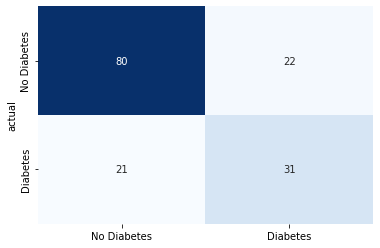

In [21]:
c_matrix = confusion_matrix(y_test,y_test_pred.round())
ax = sns.heatmap(c_matrix, annot = True, xticklabels=['No Diabetes','Diabetes'],
                                            yticklabels=['No Diabetes','Diabetes'],
                                             cbar = False,cmap ='Blues')
ax.set_label('Prediction')
ax.set_ylabel("actual")

Text(0, 0.5, 'True Positive Rate')

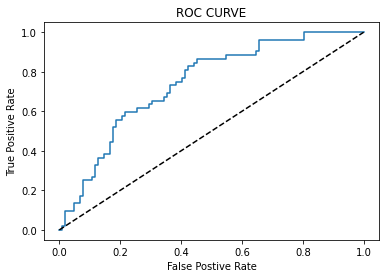

In [22]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)
FPR ,TPR, _  = roc_curve(y_test,y_test_pred_probs)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color = 'black')
plt.title('ROC CURVE')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')

### after analyzing the ROC curve, it can be said the model is able to clasify the outcomes pretty good. That said it will be able diffrentiate well.

In [23]:
# ! pip install pycaret

### Because neural networks are more difficult to train and more prone to overfitting than logistic regression, a neural network model for binary classification can be poorer than a logistic regression model. However, the main line is that, in most circumstances, utilizing a neural network rather than logistic regression when conducting binary classification is preferable. With a neural network, you should be able to achieve better outcomes if you're cautious.

### Random Forest is less computationally intensive and does not require the use of a graphics processor to complete training. A random forest can provide a better understanding of a decision tree than a decision tree. To be effective, neural networks will require far more data than the average individual has on hand. For the sake of efficiency, the neural network will just destroy the interpretability of your features to the point where they are worthless. While that may appear acceptable to some, it is depending on the project in question.

In [24]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'Outcome')
# return best model
best = compare_models()
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)
# return best model based on AUC
best = compare_models() #default is 'Accuracy'
# compare specific models
best_specific = compare_models(include = ['lr','rf','mlp'])
# blacklist certain models
best_specific = compare_models(exclude = ['svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7766,0.8346,0.5789,0.7500,0.6472,0.4889,0.5017,0.020
ridge,Ridge Classifier,0.7747,0.0000,0.5684,0.7490,0.6396,0.4818,0.4955,0.015
knn,K Neighbors Classifier,0.7725,0.7971,0.5792,0.7417,0.6424,0.4808,0.4937,0.115
lda,Linear Discriminant Analysis,0.7710,0.8356,0.5684,0.7430,0.6364,0.4752,0.4890,0.016
gbc,Gradient Boosting Classifier,0.7653,0.8310,0.6000,0.6983,0.6400,0.4694,0.4758,0.124
et,Extra Trees Classifier,0.7653,0.8261,0.5479,0.7304,0.6225,0.4586,0.4704,0.463
rf,Random Forest Classifier,0.7652,0.8279,0.5787,0.7066,0.6318,0.4640,0.4711,0.518
nb,Naive Bayes,0.7578,0.8135,0.6097,0.6836,0.6410,0.4600,0.4643,0.017
qda,Quadratic Discriminant Analysis,0.7427,0.8123,0.5839,0.6618,0.6189,0.4262,0.4293,0.016
ada,Ada Boost Classifier,0.7373,0.7969,0.5729,0.6512,0.6047,0.4106,0.4157,0.110
